# One-way ANOVA test and pairwise comparisons with TukeyHSD confidence intervals

In [52]:
# imports and setting matplotlib style
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
plt.style.use('ggplot')
#print(plt.style.available)


In [53]:

import json

seek_f = open('./seek-notebook-data-json20171118-30052-1s28yw1.json')
# now read the file
seek_f_content = seek_f.read();
seek_f_json = json.loads(seek_f_content);

# print for debugging purposes. Also interesting for the user, so leave in.
print(seek_f_json)


{'action': 'pythonize', 'id': '2', 'controller': 'data_files', 'marked': {'3': {'values': ['bl 100 mg', '3396.20069636795', '3409.46854626794', '3403.82424199505', '3419.56054167382', '3341.96850691153', '3506.53611784211', '3482.39245129226', '3391.74645891242', '3440.09364308461', '3340.34851547225', '3463.526830814', '3438.15880549147', '3421.02132110251', '3363.83517151499'], 'key': 'F'}, '4': {'values': ['bl 200 mg', '3262.51307767606', '2971.09938447534', '2746.10927557549', '3215.12167317409', '3121.2577853355', '3014.18417537859', '3100.962259306', '3173.15354023525', '3356.03507584497', '3119.76199607856', '3208.00543705302', '3131.19346437063', '3279.49091122387', '2676.35867832653'], 'key': 'G'}, '2': {'values': ['bl 50 mg', '3306.39719502061', '3503.97908962825', '3514.4286805867', '3466.60070879145', '3439.31895824104', '3546.54906424629', '3478.00071453557', '3557.75034939751', '3389.91801620791', '3501.64287494616', '3531.83311830436', '3315.67970803833', '3528.522154032

In [54]:
marked = seek_f_json["marked"];

# https://stackoverflow.com/questions/354038/how-do-i-check-if-a-string-is-a-number-float
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# put the right keys into a file that 
def headlinify(j):
    retval = dict()
    for (k,v) in j.items():
        
        first = v["values"][0];
        effective_key = "";
        if(not is_number(first)):
            retval[first] = v["values"][1:]
            effective_key = first 
        else:
            retval[k] = v;
            effective_key = k;
            
        retval[effective_key] = list(map(float,filter(is_number,retval[effective_key])))
            
    return retval
        
    
data_sep = headlinify(marked);


In [55]:
print(data_sep)

{'bl Kontrolle': [3533.05678872751, 3557.76737165814, 3582.55051616598, 3610.76495807908, 3588.32085681936, 3574.36786279139, 3612.17146696808, 3580.12178917346, 3510.34228960713, 3615.39116955649, 3534.86044754588, 3490.74082979899, 3549.49346303324, 3499.22072982818], 'bl 25 mg': [3579.76865166576, 3489.49364276611, 3622.63287399187, 2530.12322573658, 3482.7076427172, 3466.8037901986, 3486.41606430717, 3435.16084892502, 3461.64664163952, 3604.1883915461, 3518.27795405577, 3426.10704898731, 3455.01629224461, 3484.60905482305], 'bl 200 mg': [3262.51307767606, 2971.09938447534, 2746.10927557549, 3215.12167317409, 3121.2577853355, 3014.18417537859, 3100.962259306, 3173.15354023525, 3356.03507584497, 3119.76199607856, 3208.00543705302, 3131.19346437063, 3279.49091122387, 2676.35867832653], 'bl 50 mg': [3306.39719502061, 3503.97908962825, 3514.4286805867, 3466.60070879145, 3439.31895824104, 3546.54906424629, 3478.00071453557, 3557.75034939751, 3389.91801620791, 3501.64287494616, 3531.83311

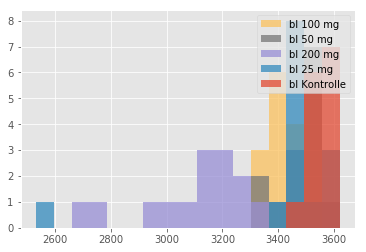

In [26]:
# histogram of data for covenience
n, bins, patches = plt.hist(data_sep.values(), int(sum(map(len, data_sep.values()))/4), histtype='stepfilled', alpha=0.75, label=(str(lab) for lab in data_sep.keys()))
plt.legend()
plt.show()

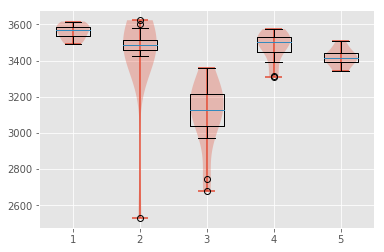

In [27]:
# box plots of data for covenience
plt.boxplot(data_sep.values())
plt.violinplot(data_sep.values())
plt.savefig("boxplots.png")
plt.show()

# Results of anova and pairwise Tukey HSD

In [28]:
anova_results = scipy.stats.f_oneway(*data_sep.values())
print(anova_results)

F_onewayResult(statistic=18.067208871615104, pvalue=5.0877522747985842e-10)


In [35]:
data_sep.values()

dict_values([[3533.05678872751, 3557.76737165814, 3582.55051616598, 3610.76495807908, 3588.32085681936, 3574.36786279139, 3612.17146696808, 3580.12178917346, 3510.34228960713, 3615.39116955649, 3534.86044754588, 3490.74082979899, 3549.49346303324, 3499.22072982818], [3579.76865166576, 3489.49364276611, 3622.63287399187, 2530.12322573658, 3482.7076427172, 3466.8037901986, 3486.41606430717, 3435.16084892502, 3461.64664163952, 3604.1883915461, 3518.27795405577, 3426.10704898731, 3455.01629224461, 3484.60905482305], [3262.51307767606, 2971.09938447534, 2746.10927557549, 3215.12167317409, 3121.2577853355, 3014.18417537859, 3100.962259306, 3173.15354023525, 3356.03507584497, 3119.76199607856, 3208.00543705302, 3131.19346437063, 3279.49091122387, 2676.35867832653], [3306.39719502061, 3503.97908962825, 3514.4286805867, 3466.60070879145, 3439.31895824104, 3546.54906424629, 3478.00071453557, 3557.75034939751, 3389.91801620791, 3501.64287494616, 3531.83311830436, 3315.67970803833, 3528.5221540328

In [50]:
def structure_for_tukeyhsd(sep):
    values = []
    groups = []
    for k,l in sep.items():
        for x in l:
            values.append(x)
            groups.append(k)
    return (values,groups)
            
(values,groups) = structure_for_tukeyhsd(data_sep)

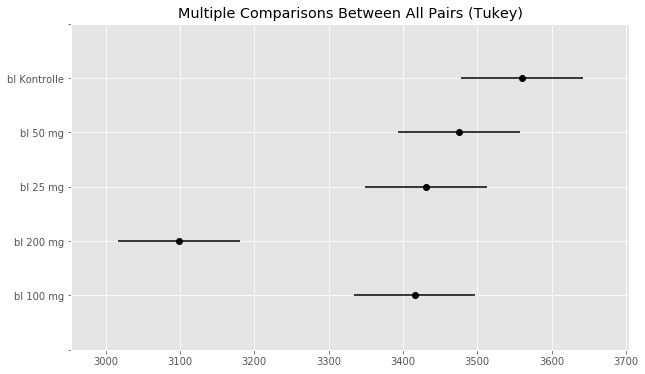

In [45]:
results = pairwise_tukeyhsd(values,groups)
results.plot_simultaneous()

In [49]:
results.summary()

group1,group2,meandiff,lower,upper,reject
bl 100 mg,bl 200 mg,-317.3882,-481.4139,-153.3625,True
bl 100 mg,bl 25 mg,16.0193,-148.0064,180.045,False
bl 100 mg,bl 50 mg,59.7,-104.3257,223.7257,False
bl 100 mg,bl Kontrolle,144.3206,-19.7051,308.3463,False
bl 200 mg,bl 25 mg,333.4075,169.3818,497.4332,True
bl 200 mg,bl 50 mg,377.0883,213.0626,541.1139,True
bl 200 mg,bl Kontrolle,461.7088,297.6832,625.7345,True
bl 25 mg,bl 50 mg,43.6807,-120.345,207.7064,False
bl 25 mg,bl Kontrolle,128.3013,-35.7244,292.327,False
bl 50 mg,bl Kontrolle,84.6206,-79.4051,248.6463,False
